In [34]:
import pickle
import pyvista as pv
import numpy as np
import pandas as pd

import sys
import os


In [35]:
#need geomodel repository/libraries

In [66]:
def geomodelSG_to_vtk(filename):
    '''
    need to be in geomodel directory and have those packages installed
    '''
    with open(filename, 'rb') as f:
        model = pickle.load(f)

    data = model._xyz_data[0].items()
    data = list(data)
    data = np.array(data)
    x = [x[0] for x in data[:,0]]
    y = [x[1] for x in data[:,0]]
    z = [x[2] for x in data[:,0]]
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    df['z'] = z
    df['modelvalues'] = data[:,1]
    #df = df.sort_values(by=['z','y','x'])
    grid = pv.RectilinearGrid(np.asarray(df['x']), np.asarray(df['y']), np.asarray(df['z']))
    grid['modelvalues'] = np.asarray(df['modelvalues'])
    
    grid.save(filename + '.vtr')
        
    return grid



In [2]:
with open(r'E:/3D_Map_of_North_Queensland_2009_3D_Data/inversions_grav_mag_voxets/inversions\SGrids/Cloncurry_inversions_unconst_den.pkl','rb') as f:
    density = pickle.load(f)
    
density

_atom_arr: []
_ijk_data: [defaultdict(<class 'list'>, {(0, 0, 0): -100000.0, (1, 0, 0): -100000.0, (2, 0, 0): -100000.0, (3, 0, 0): -100000.0, (4, 0, 0): -100000.0, (5, 0, 0): -100000.0, (6, 0, 0): -100000.0, (7, 0, 0): -100000.0, (8, 0, 0): -100000.0, (9, 0, 0): -100000.0, (10, 0, 0): -100000.0, (11, 0, 0): -100000.0, (12, 0, 0): -100000.0, (13, 0, 0): -100000.0, (14, 0, 0): -100000.0, (15, 0, 0): -100000.0, (16, 0, 0): -100000.0, (17, 0, 0): -100000.0, (18, 0, 0): -100000.0, (19, 0, 0): -100000.0, (20, 0, 0): -100000.
_max_data: [2.960391044616699]
_min_data: [2.59062]
_no_data_marker: [-100000.0]
_seg_arr: []
_trgl_arr: []
_vrtx_arr: []
_xyz_data: [defaultdict(<class 'list'>, {(-30000.0, 7281000.0, 3000.0): -100000.0, (18000.0, 7413000.0, 3000.0): -100000.0, (66000.0, 7545000.0, 3000.0): -100000.0, (114000.0, 7677000.0, 3000.0): -100000.0, (162000.0, 7809000.0, 3000.0): -100000.0, (210000.0, 7377000.0, 2750.0): -100000.0, (258000.0, 7509000.0, 2750.0): -100000.0, (-18000.0, 7643000.

In [3]:
density.vol_data.max()

0.0

In [4]:
junk = density._xyz_data[0].items()
junkl = list(junk)
junka = np.array(junkl)


<ipython-input-4-d14641d46f8f>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  junka = np.array(junkl)


In [5]:
junka.shape

(1673917, 2)

In [6]:
junka[0]

array([(-30000.0, 7281000.0, 3000.0), -100000.0], dtype=object)

In [7]:
junka[:,0]

array([(-30000.0, 7281000.0, 3000.0), (18000.0, 7413000.0, 3000.0),
       (66000.0, 7545000.0, 3000.0), ..., (70000.0, 7447000.0, -25000.0),
       (118000.0, 7579000.0, -25000.0), (166000.0, 7711000.0, -25000.0)],
      dtype=object)

In [8]:
x = [x[0] for x in junka[:,0]]
y = [x[1] for x in junka[:,0]]
z = [x[2] for x in junka[:,0]]

In [9]:
d = pd.DataFrame()
d['x'] = x
d['y'] = y
d['z'] = z
d['density'] = junka[:,1]

In [10]:
d.head()
d = d.sort_values(by=['z','y','x'])

In [11]:
grid = pv.RectilinearGrid(np.asarray(d['x']), np.asarray(d['y']), np.asarray(d['z']))
grid

RectilinearGrid,Information
N Cells,1673917
N Points,1735992
X Bounds,"-3.000e+04, 2.920e+05"
Y Bounds,"7.281e+06, 7.843e+06"
Z Bounds,"-2.500e+04, 3.000e+03"
Dimensions,"162, 282, 38"
N Arrays,0


In [12]:
grid['density'] = np.asarray(d['density'])
#grid.plot()

In [13]:
grid

RectilinearGrid (0x15e5b2d7640)
  N Cells:	1673917
  N Points:	1735992
  X Bounds:	-3.000e+04, 2.920e+05
  Y Bounds:	7.281e+06, 7.843e+06
  Z Bounds:	-2.500e+04, 3.000e+03
  Dimensions:	162, 282, 38
  N Arrays:	1

In [14]:
d.head()

,x,y,z,density
1390714,-30000.0,7281000.0,-25000.0,2.80016
1435955,-28000.0,7281000.0,-25000.0,2.79976
1481196,-26000.0,7281000.0,-25000.0,2.79943
1526437,-24000.0,7281000.0,-25000.0,2.7991
1571678,-22000.0,7281000.0,-25000.0,2.79883


In [16]:
grid['density'].plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [17]:
grid.save(r'E:/3D_Map_of_North_Queensland_2009_3D_Data/inversions_grav_mag_voxets/inversions\SGrids/Cloncurry_inversions_unconst_den.pkl.vtk')

In [29]:
grid = geomodelSG_to_vtk(r'E:/3D_Map_of_North_Queensland_2009_3D_Data/inversions_grav_mag_voxets/inversions\SGrids/Cloncurry_inversions_unconst_den.pkl')

<ipython-input-28-70aae37a95b6>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array(data)


In [23]:
grid

RectilinearGrid (0x15e0db265e0)
  N Cells:	1673917
  N Points:	1735992
  X Bounds:	-3.000e+04, 2.920e+05
  Y Bounds:	7.281e+06, 7.843e+06
  Z Bounds:	-2.500e+04, 3.000e+03
  Dimensions:	162, 282, 38
  N Arrays:	1

In [25]:
grid['modelvalues'][500000]

'2.7953384'

In [30]:
grid = geomodelSG_to_vtk(r'E:/3D_Map_of_North_Queensland_2009_3D_Data/inversions_grav_mag_voxets/inversions/SGrids/Cloncurry_inversions_unconst_sus@@.pkl')

<ipython-input-28-70aae37a95b6>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array(data)


In [32]:
test = pv.read(r'E:/3D_Map_of_North_Queensland_2009_3D_Data/inversions_grav_mag_voxets/inversions/SGrids/Cloncurry_inversions_unconst_sus@@.pkl.vtr')

In [33]:
test

RectilinearGrid (0x15e144d43a0)
  N Cells:	1673917
  N Points:	1735992
  X Bounds:	-3.000e+04, 2.920e+05
  Y Bounds:	7.281e+06, 7.843e+06
  Z Bounds:	-2.500e+04, 3.000e+03
  Dimensions:	162, 282, 38
  N Arrays:	1

In [37]:
mapdir = r'E:\3D_Map_of_North_Queensland_2009_3D_Data\inversions_grav_mag_voxets\inversions\SGrids' + "\\"
maplist = ['3DMap_inversions_const_sus@@.pkl', '3DMap_inversions_const_den@@.pkl', '3DMap_inversions_const_reference_den@@.pkl','3DMap_inversions_const_reference_sus@@.pkl']

for m in maplist:
    fileuse = mapdir + m
    grid = geomodelSG_to_vtk(fileuse)

<ipython-input-28-70aae37a95b6>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array(data)


In [38]:
test = pv.read(mapdir + '3DMap_inversions_const_reference_sus@@.pkl.vtr')
test

RectilinearGrid (0x15e144d4e80)
  N Cells:	4056939
  N Points:	4192160
  X Bounds:	3.400e+04, 8.200e+05
  Y Bounds:	7.560e+06, 8.118e+06
  Z Bounds:	-2.500e+04, 3.000e+03
  Dimensions:	394, 280, 38
  N Arrays:	1

In [39]:
test['modelvalues'][2000000]

'0.001'

In [41]:
with open(r'E:\3D_Map_of_North_Queensland_2009_3D_Data\inversions_grav_mag_voxets\inversions\SGrids\3DMap_inversions_const_reference_den@@.pkl','rb') as f:
    dentest = pickle.load(f)
    
dentest    

_atom_arr: []
_ijk_data: [defaultdict(<class 'list'>, {(0, 0, 0): 0.0, (1, 0, 0): 0.0, (2, 0, 0): 0.0, (3, 0, 0): 0.0, (4, 0, 0): 0.0, (5, 0, 0): 0.0, (6, 0, 0): 0.0, (7, 0, 0): 0.0, (8, 0, 0): 0.0, (9, 0, 0): 0.0, (10, 0, 0): 0.0, (11, 0, 0): 0.0, (12, 0, 0): 0.0, (13, 0, 0): 0.0, (14, 0, 0): 0.0, (15, 0, 0): 0.0, (16, 0, 0): 0.0, (17, 0, 0): 0.0, (18, 0, 0): 0.0, (19, 0, 0): 0.0, (20, 0, 0): 0.0, (21, 0, 0): 0.0, (22, 0, 0): 0.0, (23, 0, 0): 0.0, (24, 0, 0): 0.0, (25, 0, 0): 0.0, (26, 0, 0): 0.0, (27, 0, 0): 0.0, (28,
_max_data: [0.03999999910593033]
_min_data: [-1.75]
_no_data_marker: [-99999.0]
_seg_arr: []
_trgl_arr: []
_vrtx_arr: []
_xyz_data: [defaultdict(<class 'list'>, {(34000.0, 7560000.0, 3000.0): 0.0, (38000.0, 7614000.0, 3000.0): 0.0, (42000.0, 7668000.0, 3000.0): 0.0, (46000.0, 7722000.0, 3000.0): 0.0, (50000.0, 7776000.0, 3000.0): 0.0, (54000.0, 7830000.0, 3000.0): 0.0, (58000.0, 7884000.0, 3000.0): 0.0, (62000.0, 7938000.0, 3000.0): 0.0, (66000.0, 7992000.0, 3000.0): 0.

In [42]:
model = dentest
data = model._xyz_data[0].items()
data = list(data)

data = np.array(data)
x = [x[0] for x in data[:,0]]
y = [x[1] for x in data[:,0]]
z = [x[2] for x in data[:,0]]
df = pd.DataFrame()
df['x'] = x
df['y'] = y
df['z'] = z
df['modelvalues'] = data[:,1]

<ipython-input-42-1cc39ba0c8f7>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array(data)


In [43]:
df.head()

,x,y,z,modelvalues
0,34000.0,7560000.0,3000.0,0
1,38000.0,7614000.0,3000.0,0
2,42000.0,7668000.0,3000.0,0
3,46000.0,7722000.0,3000.0,0
4,50000.0,7776000.0,3000.0,0


In [47]:
df['modelvalues'].min()

-1.75

In [48]:
grid = pv.RectilinearGrid(np.asarray(df['x']), np.asarray(df['y']), np.asarray(df['z']))
grid['modelvalues'] = np.asarray(df['modelvalues'])
grid

RectilinearGrid (0x15e144d4d00)
  N Cells:	4056939
  N Points:	4192160
  X Bounds:	3.400e+04, 8.200e+05
  Y Bounds:	7.560e+06, 8.118e+06
  Z Bounds:	-2.500e+04, 3.000e+03
  Dimensions:	394, 280, 38
  N Arrays:	1

In [63]:
clip = grid.clip_box(factor=0.02,invert=False)

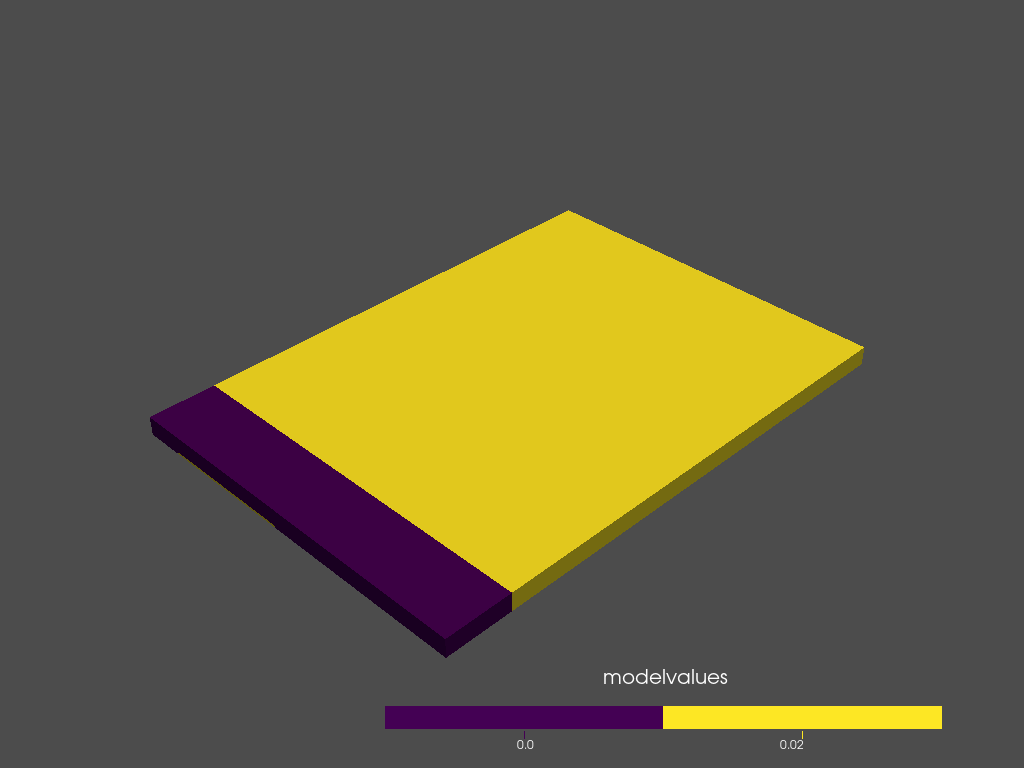

In [64]:
clip.plot()

In [60]:
clip = grid.clip_box([350000,450000,7500000,7600000,-5000,0],invert=False)

In [61]:
clip

UnstructuredGrid (0x15e262fe460)
  N Cells:	30000
  N Points:	6426
  X Bounds:	3.500e+05, 4.500e+05
  Y Bounds:	7.560e+06, 7.600e+06
  Z Bounds:	-5.000e+03, 0.000e+00
  N Arrays:	1

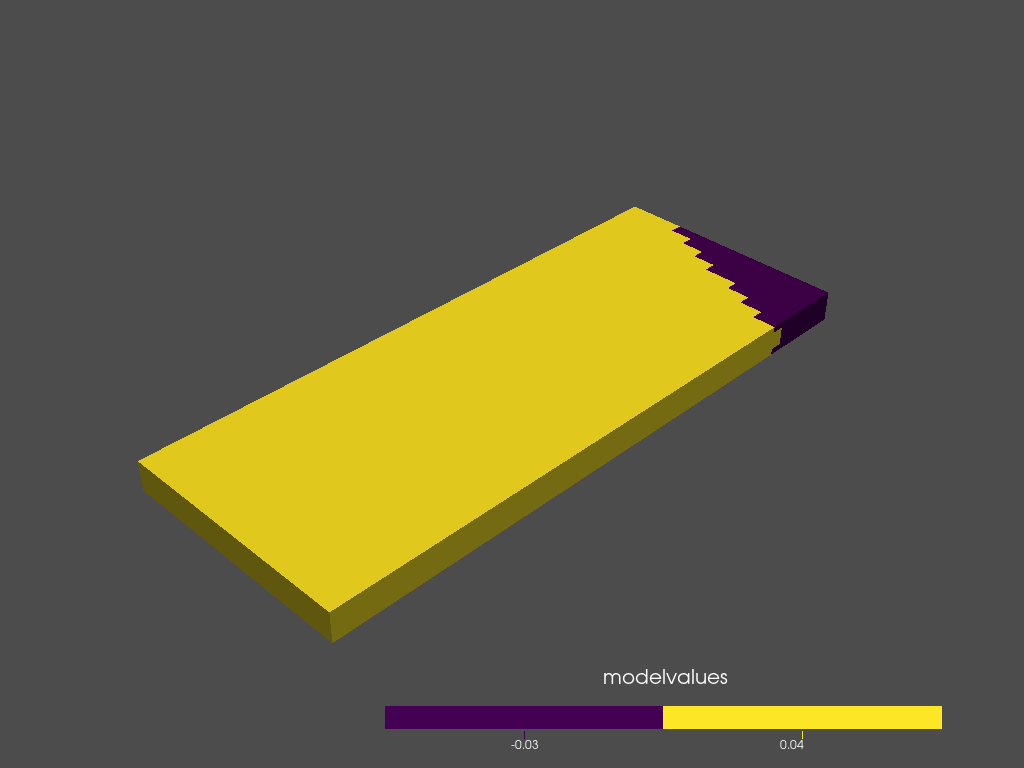

In [62]:
clip.plot()

In [69]:
dengrid = geomodelSG_to_vtk(r'E:\3D_Map_of_North_Queensland_2009_3D_Data\inversions_grav_mag_voxets\inversions\SGrids\3DMap_inversions_const_den@@.pkl')
dengrid

<ipython-input-66-b4fa04be5c29>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array(data)


RectilinearGrid (0x15e262feca0)
  N Cells:	4056939
  N Points:	4192160
  X Bounds:	3.400e+04, 8.200e+05
  Y Bounds:	7.560e+06, 8.118e+06
  Z Bounds:	-2.500e+04, 3.000e+03
  Dimensions:	394, 280, 38
  N Arrays:	1

In [70]:
clip = dengrid.clip_box([350000,450000,7500000,7600000,-5000,0],invert=False)
clip

UnstructuredGrid (0x15e262fe5e0)
  N Cells:	30000
  N Points:	6426
  X Bounds:	3.500e+05, 4.500e+05
  Y Bounds:	7.560e+06, 7.600e+06
  Z Bounds:	-5.000e+03, 0.000e+00
  N Arrays:	1

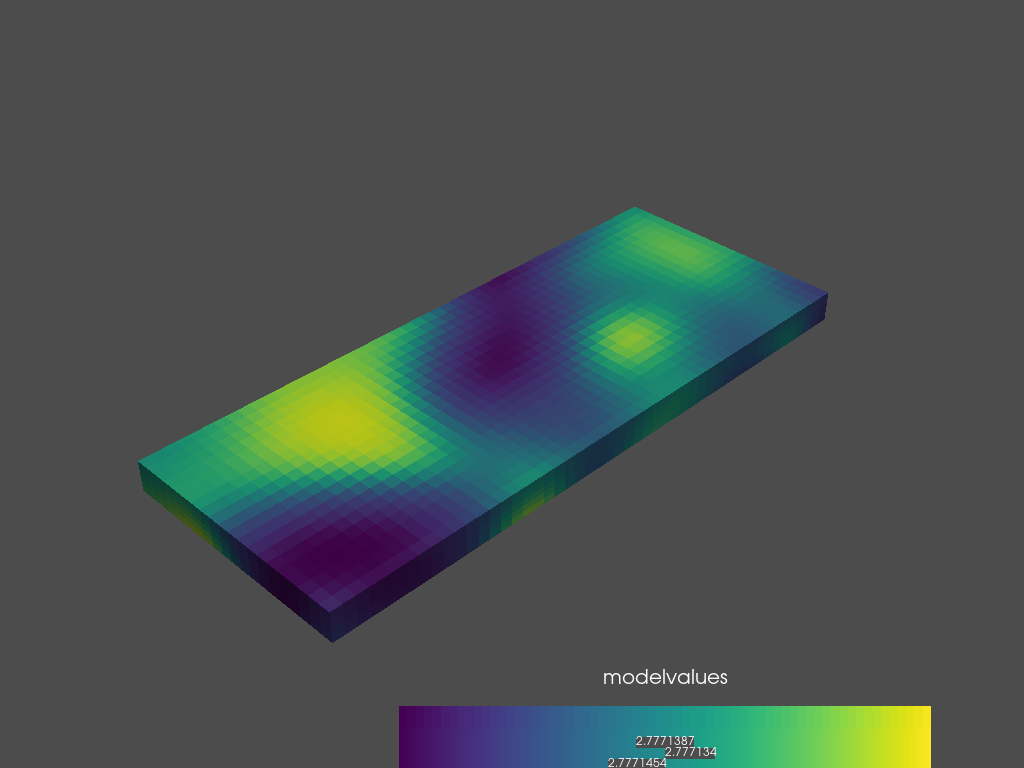

In [71]:
clip.plot()

In [72]:
dengrid2 = geomodelSG_to_vtk(r'E:\3D_Map_of_North_Queensland_2009_3D_Data\inversions_grav_mag_voxets\inversions\SGrids\3DMap_inversions_const_reference_den@@.pkl')
dengrid2

<ipython-input-66-b4fa04be5c29>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array(data)


RectilinearGrid (0x15e262fea60)
  N Cells:	4056939
  N Points:	4192160
  X Bounds:	3.400e+04, 8.200e+05
  Y Bounds:	7.560e+06, 8.118e+06
  Z Bounds:	-2.500e+04, 3.000e+03
  Dimensions:	394, 280, 38
  N Arrays:	1

In [75]:
clip = dengrid2.clip_box([350000,450000,7500000,7600000,-5000,0],invert=False)
clip

UnstructuredGrid (0x15e2f9aebe0)
  N Cells:	30000
  N Points:	6426
  X Bounds:	3.500e+05, 4.500e+05
  Y Bounds:	7.560e+06, 7.600e+06
  Z Bounds:	-5.000e+03, 0.000e+00
  N Arrays:	1

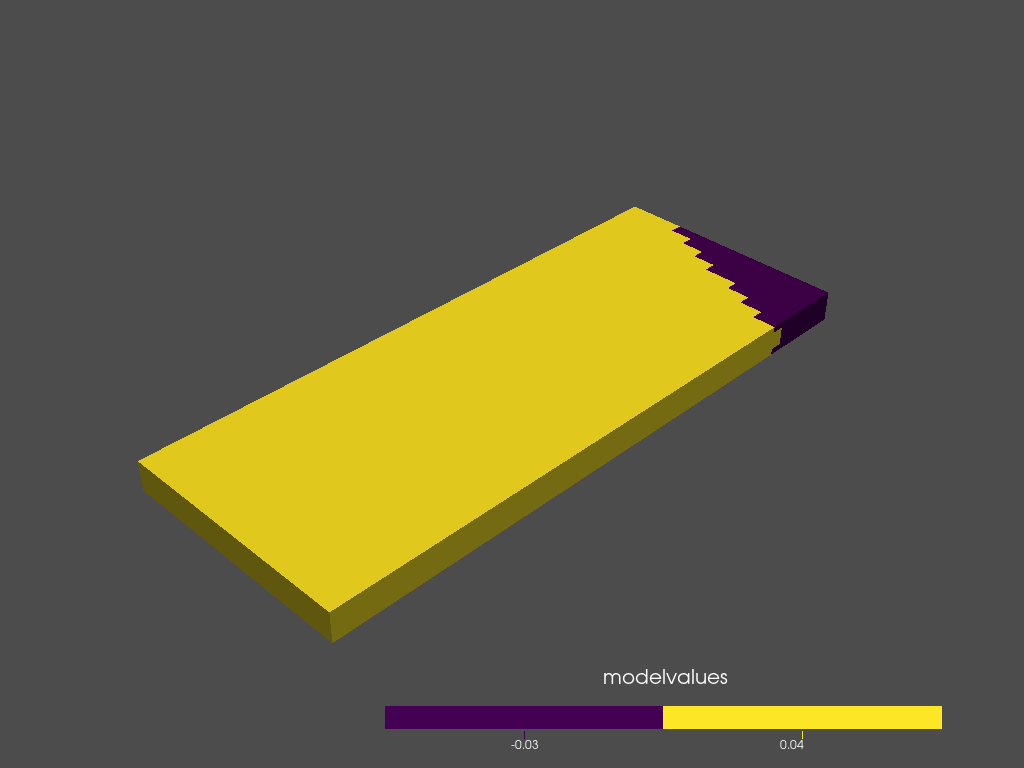

In [76]:
clip.plot()

In [77]:
maggrid2 = geomodelSG_to_vtk(r'E:\3D_Map_of_North_Queensland_2009_3D_Data\inversions_grav_mag_voxets\inversions\SGrids\3DMap_inversions_const_reference_sus@@.pkl')
maggrid2

<ipython-input-66-b4fa04be5c29>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array(data)


RectilinearGrid (0x15e07aa7ee0)
  N Cells:	4056939
  N Points:	4192160
  X Bounds:	3.400e+04, 8.200e+05
  Y Bounds:	7.560e+06, 8.118e+06
  Z Bounds:	-2.500e+04, 3.000e+03
  Dimensions:	394, 280, 38
  N Arrays:	1

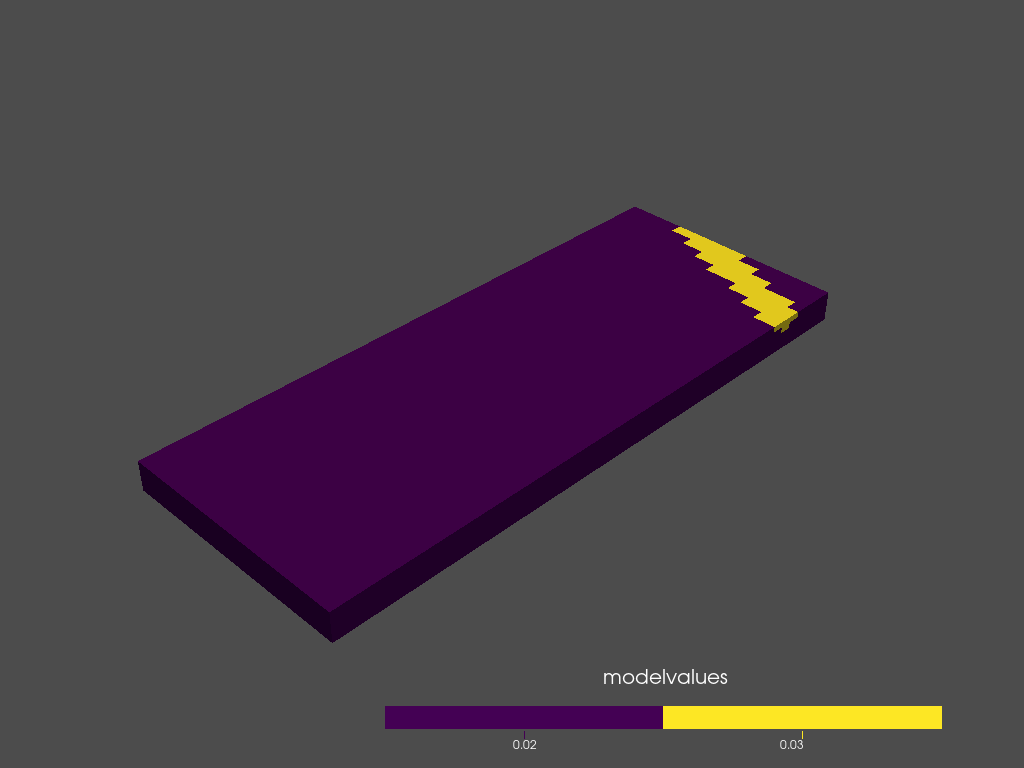

In [78]:
clip = maggrid2.clip_box([350000,450000,7500000,7600000,-5000,0],invert=False)
clip
clip.plot()

In [80]:
maggrid = geomodelSG_to_vtk(r'E:\3D_Map_of_North_Queensland_2009_3D_Data\inversions_grav_mag_voxets\inversions\SGrids\3DMap_inversions_const_sus@@.pkl')
maggrid


<ipython-input-66-b4fa04be5c29>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array(data)


RectilinearGrid (0x15e2f9aea00)
  N Cells:	4056939
  N Points:	4192160
  X Bounds:	3.400e+04, 8.200e+05
  Y Bounds:	7.560e+06, 8.118e+06
  Z Bounds:	-2.500e+04, 3.000e+03
  Dimensions:	394, 280, 38
  N Arrays:	1

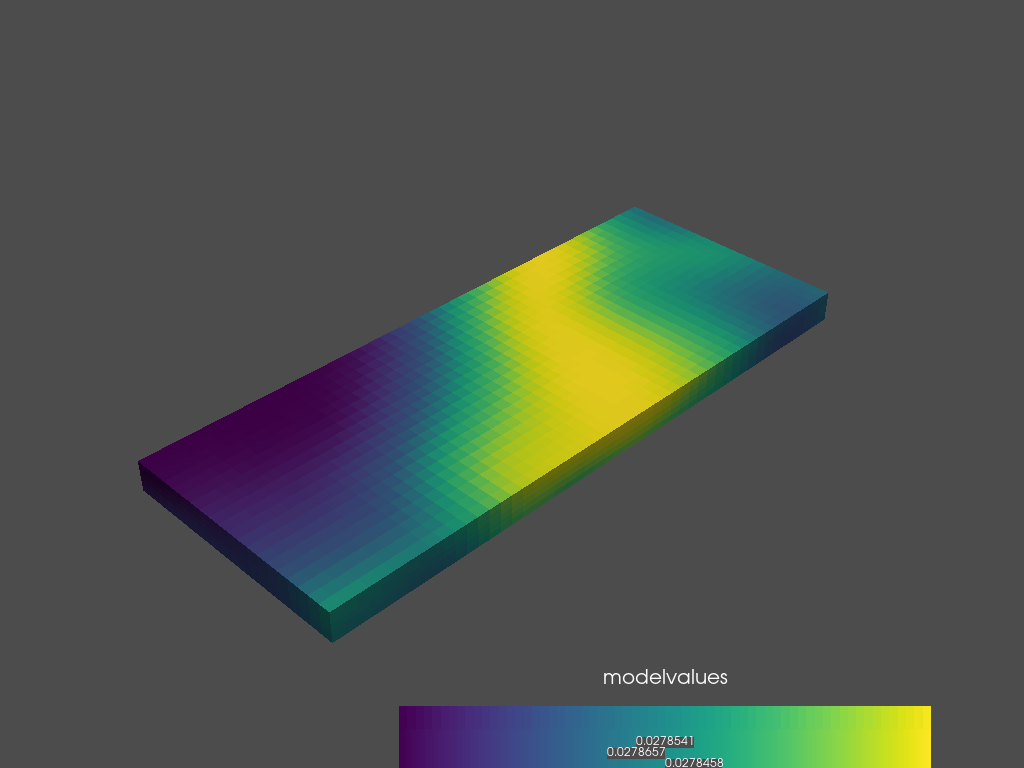

In [81]:
clip = maggrid.clip_box([350000,450000,7500000,7600000,-5000,0],invert=False)
clip
clip.plot()

In [ ]:
maggrid.plot()